In [1]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.insert(0, '../')

from TextLabeller import *
from plotting import *

%matplotlib inline

In [2]:
from plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [3]:
def classify(x, y, train_test_ratio):

    x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = train_test_ratio)

    print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
    print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
    print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

    # Initialize classifier
    rfc = RandomForestClassifier()
#     from sklearn.naive_bayes import GaussianNB
#     rfc = GaussianNB()

    # Train classifier
    model = rfc.fit(x_train, train_labels)

    # Make predictions
    y_preds = rfc.predict(test)

    # Evaluate model
    print(classification_report(test_labels, y_preds))
    print(accuracy_score(test_labels, y_preds))
    print(confusion_matrix(test_labels, y_preds))
    
    return test_labels, y_preds


# ROC Curve
def plot_roc_curve(test_labels, y_preds):
    fpr, tpr, threshold = roc_curve(test_labels, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

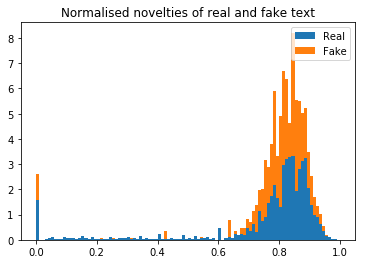

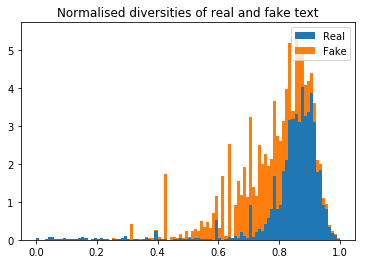

In [4]:
def normalize(distances):
    """
    """
    min_val, max_val = min(distances), max(distances)
    return [(val - 0) / (max_val - 0) for val in distances]

from utils import read_list, normal_distribution, get_scatter_plot, inverse_distances, normed_dists_to_sims

# Initial jaccard similarities
jac_real_diversities = read_list('jaccard_diversities_real.txt')
jac_real_novelties = read_list('jaccard_novelties_real.txt')
jac_fake_diversities = read_list('jaccard_diversities_fake3.txt')
jac_fake_novelties = read_list('jaccard_novelties_fake3.txt')

# Transform distances to similarities
jac_real_diversities = normalize(jac_real_diversities)
jac_real_novelties = normalize(jac_real_novelties)
jac_fake_diversities = normalize(jac_fake_diversities)
jac_fake_novelties = normalize(jac_fake_novelties)

def stacked_hist(data, name):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
    plt.title(name)
    plt.show()
    
def _stacked_hist(data):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
#     plt.title(name)
    plt.show()
    
def combine_metrics_list(list1, list2, list3):
    combined_list = [list1]
    combined_list.append(list2)
    combined_list.append(list3)
    
    return combined_list

def combine_real_fake(real_list, fake_list):
    combined_list = [real_list]
    combined_list.append(fake_list)
    return combined_list

# Novelties of real and fake text using jaccard similarity metric
jac_novs = combine_real_fake(jac_real_novelties, jac_fake_novelties)
stacked_hist(jac_novs, "Normalised novelties of real and fake text")

# Diversities of real and fake text using jaccard similarity metric
jac_divs = combine_real_fake(jac_real_diversities, jac_fake_diversities)
stacked_hist(jac_divs, "Normalised diversities of real and fake text")

   index                                               text   novelty  \
0      0  the scottish government has won and not necess...  0.718750   
1      1  the more of the main people do not to not pay ...  0.666667   
2      2  it was a shame , but when they put it up for h...  0.676471   
3      3  `` it took me , but that is a good thing , but...  0.600000   
4      4  `` i didn ' t have that a citizen of the famil...  0.666667   
5      5  we need to be , but `` that ' s just a chance ...  0.611111   
6      6  it is a better option that ' s a brexit , or m...  0.687500   
7      7  and it is ten and are not required to make it ...  0.625000   
8      8  you need to be ready , but they can draw atten...  0.687500   
9      9  `` the only thing that you are able to do anyt...  0.558824   

   diversity  label  
0   0.645161      0  
1   0.586207      0  
2   0.612903      0  
3   0.407407      0  
4   0.566667      0  
5   0.531250      0  
6   0.666667      0  
7   0.645161      0 

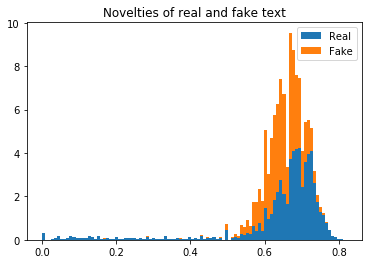

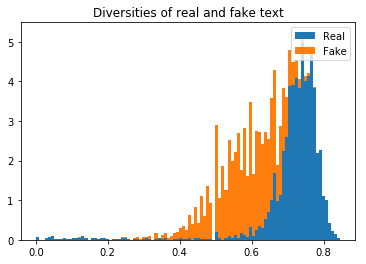

In [5]:
METRIC = "jaccard"

labelled_real=f'{METRIC}_labelled_real_text.csv'
labelled_fake=f'{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

print(fake_data.head(10))

# fake_data = fake_data[len(real_data['text'].split()) >= 20]

combined_data = real_data.append(fake_data)

y = combined_data['label'].values
print(y)

csvjac_novs = combine_real_fake(real_data['novelty'], fake_data['novelty'])
stacked_hist(csvjac_novs, "Novelties of real and fake text")


csvjac_divs = combine_real_fake(real_data['diversity'], fake_data['diversity'])
stacked_hist(csvjac_divs, "Diversities of real and fake text")

## Classify using both novelty and diversity

input dimensions: 20670 | output dimensions: 20670
x_train dimensions: 18603 | y_train dimensions: 18603
x_test dimensions: 2067 | y_test dimensions: 2067
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1010
           1       0.91      0.93      0.92      1057

   micro avg       0.92      0.92      0.92      2067
   macro avg       0.92      0.92      0.92      2067
weighted avg       0.92      0.92      0.92      2067

0.9172714078374455
[[917  93]
 [ 78 979]]


C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


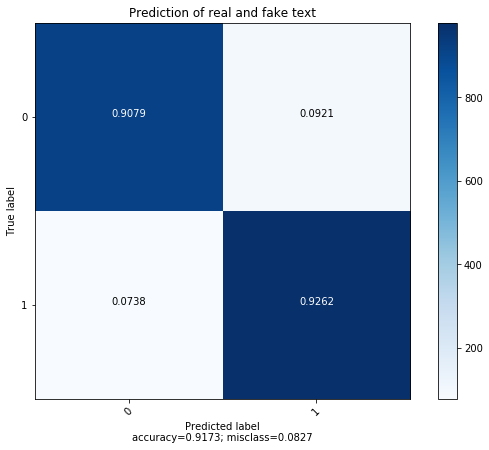

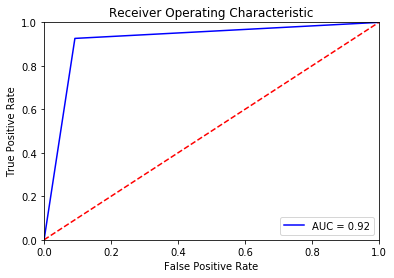

In [6]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

novs_divs_x = list()
for ix, nov in enumerate(novs):
    novs_divs_x.append([nov, divs[ix]])

test_labels, y_preds = classify(novs_divs_x, y, 0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

In [7]:
# novs = combined_data['novelty'].values
# divs = combined_data['diversity'].values

# x = list()
# for ix, nov in enumerate(novs):
#     x.append([nov, divs[ix]])

# test_labels, y_preds = classify(x, y, 0.1)

# cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
# results = y
# fprs, tprs, scores = [], [], []
    
# for (train, test), i in zip(cv.split(x, y), range(5)):
#     clf.fit(X.iloc[train], y.iloc[train])
#     _, _, auc_score_train = compute_roc_auc(train)
#     fpr, tpr, auc_score = compute_roc_auc(test)
#     scores.append((auc_score_train, auc_score))
#     fprs.append(fpr)
#     tprs.append(tpr)

# plot_roc_curve(fprs, tprs);
# pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

## Classify using only novelty

input dimensions: 20670 | output dimensions: 20670
x_train dimensions: 18603 | y_train dimensions: 18603
x_test dimensions: 2067 | y_test dimensions: 2067
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1019
           1       0.72      0.57      0.64      1048

   micro avg       0.67      0.67      0.67      2067
   macro avg       0.68      0.67      0.67      2067
weighted avg       0.68      0.67      0.67      2067

0.6715045960328979
[[789 230]
 [449 599]]


C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


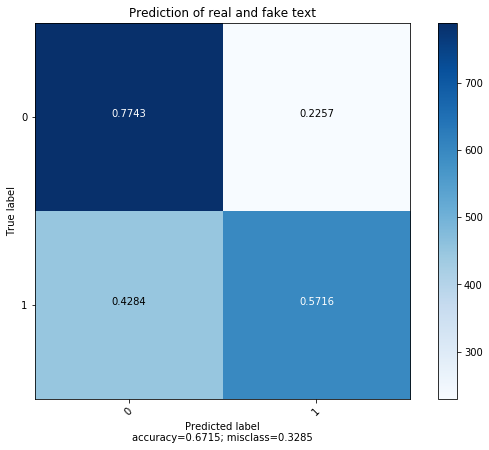

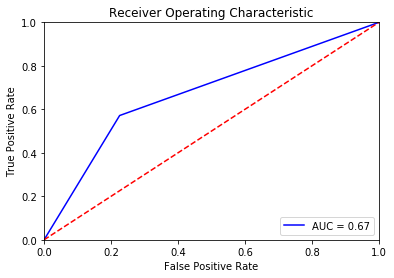

In [8]:
novs = combined_data['novelty'].values

novs_x = list()
for ix, nov in enumerate(novs):
    novs_x.append([nov])

test_labels, y_preds = classify(novs_x, y, 0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

## Classify using only diversity

input dimensions: 20670 | output dimensions: 20670
x_train dimensions: 18603 | y_train dimensions: 18603
x_test dimensions: 2067 | y_test dimensions: 2067
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1082
           1       0.87      0.88      0.88       985

   micro avg       0.88      0.88      0.88      2067
   macro avg       0.88      0.88      0.88      2067
weighted avg       0.88      0.88      0.88      2067

0.8814707305273343
[[958 124]
 [121 864]]


C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


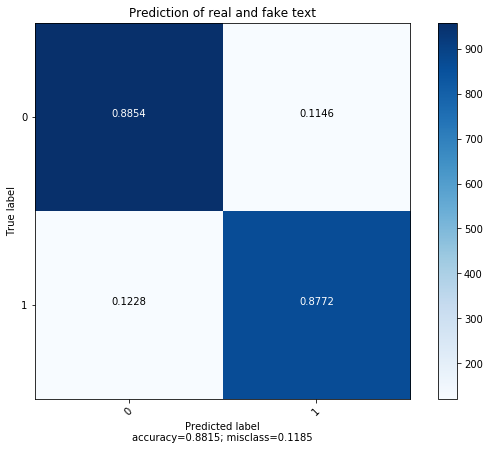

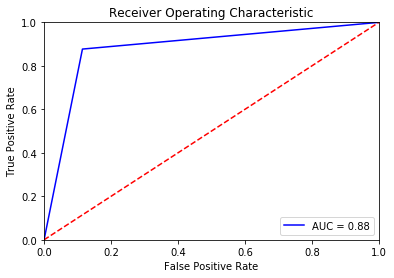

In [9]:
divs = combined_data['diversity'].values

divs_x = list()
for ix, div in enumerate(divs):
    divs_x.append([div])

test_labels, y_preds = classify(divs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

In [10]:
from sklearn import model_selection

def crwac(y_true, y_pred):
    print(classification_report(y_true, y_pred))

seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring='accuracy'
cv_results = model_selection.cross_val_score(RandomForestClassifier(), divs_x, y, cv=kfold, scoring=scoring)
print(cv_results.mean())

C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\deb.chk\.conda\envs\tf-

0.8658442186744072


C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[0.6060606060606061], [0.6285714285714286], [0.5833333333333333], [0.65625], [0.6363636363636364], [0.6666666666666667], [0.625], [0.7234042553191489], [0.6666666666666667], [0.7272727272727273]] [0 1 1 0 0 0 1 1 1 1]
[0.01978046 0.3962045  0.96723819 ... 0.53912879 0.13046967 0.60992451]
[[0.625], [0.7272727272727273], [0.625], [0.7297297297297297], [0.6774193548387097], [0.7659574468085106], [0.6857142857142857], [0.6486486486486487], [0.6333333333333333], [0.6333333333333333]] [0 1 0 1 1 1 1 0 0 0]
[0.14700499 0.05521787 0.20429111 ... 0.01373767 0.         0.98341039]
[[0.6944444444444444, 0.7027027027027026], [0.59375, 0.43333333333333335], [0.53125, 0.16666666666666666], [0.6363636363636364, 0.6060606060606061], [0.6666666666666667, 0.6451612903225806], [0.6363636363636364, 0.6206896551724138], [0.625, 0.5555555555555556], [0.696969696969697, 0.5517241379310345], [0.64, 0.5833333333333333], [0.5714285714285714, 0.3478260869565217]] [0 0 1 0 0 0 0 0 0 0]
[0.01538462 0.1        0.

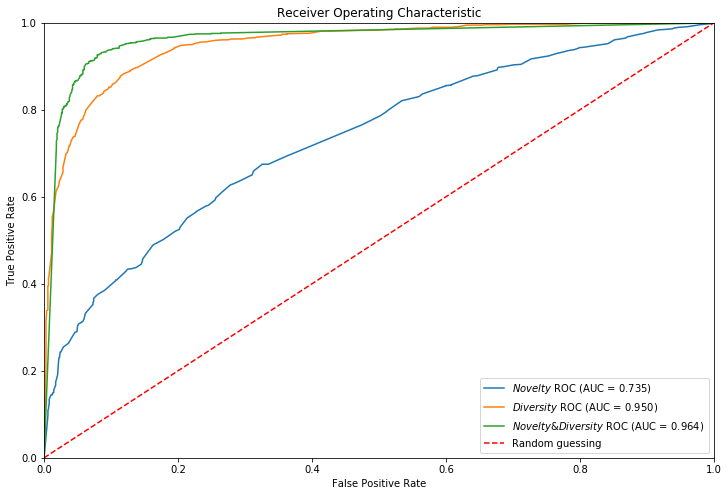

In [11]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

models =[ RandomForestClassifier(), GaussianNB()]

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': '$Novelty$',
    'model': None,
    'metric': novs_x
},
{
    'label': '$Diversity$',
    'model': None,
    'metric': divs_x
},
    {
    'label': '$Novelty & Diversity$',
    'model': None,
    'metric': novs_divs_x
},
]

# print(metrics[0])

# Below for loop iterates through your models list
for m in metrics:
    model = models[0] # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    print(x_train[:10], y_train[:10])
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data
    
    print(y_preds)

    fpr, tpr, _ = roc_curve(y_test, y_preds)
#     print(fpr, tpr)
    roc_auc = auc(fpr, tpr)
#     print(roc_auc)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (m['label'], roc_auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()   # Display



In [13]:
# f, (ax1, ax2) = plt.subplots(1, 2)


# for m in metrics:
#     model = models[0] # select the model
#     x = m['metric']
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
#     print(x_train[:10], y_train[:10])
#     model.fit(x_train, y_train) # train the model
#     y_preds=model.predict_proba(x_test)[:,1] # predict the test data
    
#     print(y_preds)

#     fpr, tpr, _ = roc_curve(y_test, y_preds)
# #     print(fpr, tpr)
#     roc_auc = auc(fpr, tpr)
# #     print(roc_auc)
#     plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (m['label'], roc_auc))

# ax1.hist(list(filter(lambda x : x >= 0, words_lens3)), bins=None )
# # ax1.set_title('Real Text Corpus')
# ax2.hist(list(filter(lambda x : x >= 20, words_lens3)), bins=None  )
# # ax2.set_title('Processed Real Text Corpus')
# ax2.set_xlim(0,55)
# ax1.set_xlim(0,55)
# ax1.set_title('Original Synthetic Text Set')
# # axarr[1, 1].hist(list(filter(lambda x : x >= 20, words_lens3*1)), bins=None  )
# ax2.set_title('Filtered Synthetic Text Set')
# for ax in (ax1, ax2):
#     ax.set(ylabel='Number of sentences', xlabel='Number of words')
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in (ax1, ax2):
#     ax.label_outer()
    
# f.set_figheight(6)
# f.set_figwidth(15)

C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


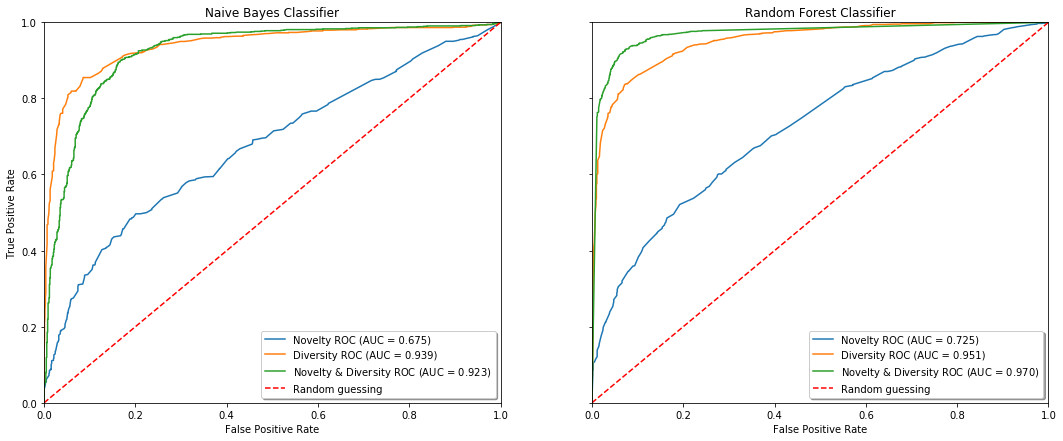

In [14]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': model,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': model,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': model,
    'metric': novs_divs_x
},
]


# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))

            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display



C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\deb.chk\.conda\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


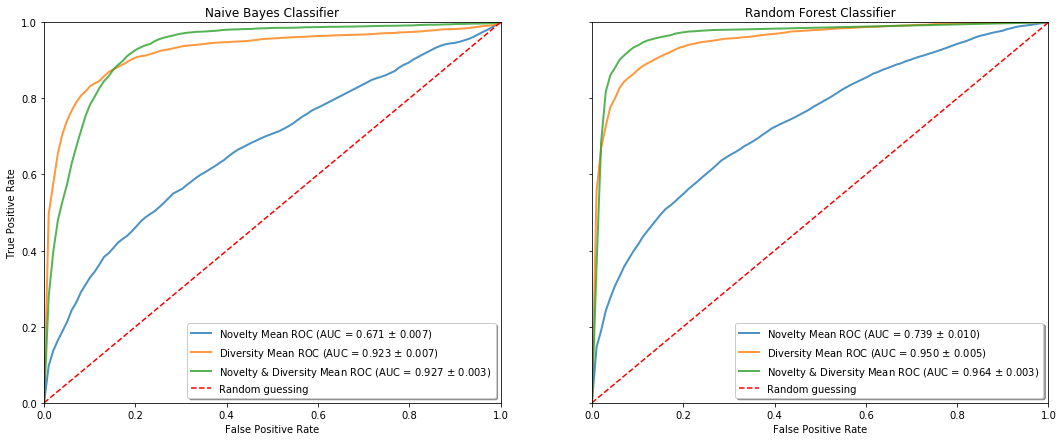

In [19]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': None,
    'metric': novs_divs_x
},
]

seed=7

# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    
    cv = StratifiedKFold(n_splits=6, random_state=seed)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    X=x
    
    i = 0
    for train, test in cv.split(x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)

#     std_tpr = np.std(tprs, axis=0)
#     tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#     tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#     plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                      label=r'$\pm$ 1 std. dev.')
    
    
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
#     model.fit(x_train, y_train) # train the model
#     y_preds=model.predict_proba(x_test)[:,1] # predict the test data

#     fpr, tpr, _ = roc_curve(y_test, y_preds)
#     roc_auc = auc(fpr, tpr)
#     ax1.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))

            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    
    cv = StratifiedKFold(n_splits=6)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    X=x
    
    i = 0
    for train, test in cv.split(x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax2.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display























# import numpy as np
# from scipy import interp
# import matplotlib.pyplot as plt

# from sklearn import svm, datasets
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import StratifiedKFold

# # #############################################################################
# # Data IO and generation

# # Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# X, y = X[y != 2], y[y != 2]
# n_samples, n_features = X.shape

# # Add noisy features
# random_state = np.random.RandomState(0)
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# # #############################################################################
# # Classification and ROC analysis

# # Run classifier with cross-validation and plot ROC curves
# cv = StratifiedKFold(n_splits=6)
# classifier = svm.SVC(kernel='linear', probability=True,
#                      random_state=random_state)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# i = 0
# for train, test in cv.split(X, y):
#     probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
#     # Compute ROC curve and area the curve
#     fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
#     tprs.append(interp(mean_fpr, fpr, tpr))
#     tprs[-1][0] = 0.0
#     roc_auc = auc(fpr, tpr)
#     aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#     i += 1
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#          label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# plt.plot(mean_fpr, mean_tpr, color='b',
#          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#          lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                  label=r'$\pm$ 1 std. dev.')

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()